In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [2]:
import math, sympy, numpy
sympy.init_printing(use_unicode=True)
from sympy import *
from mpmath import *
from sympy.physics.vector import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import pylab as plt
import matplotlib
%matplotlib inline

[Computer Algebra I: Mathematica, SymPy, Sage, Maxima](http://hyperpolyglot.org/computer-algebra2)

[SymPy. Vector & ReferenceFrame](https://docs.sympy.org/latest/modules/physics/vector/vectors.html)

[LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[МЦНМО. Свободно распространяемые издания](https://www.mccme.ru/free-books/)

# Типовой расчет 13 / Standard Calculation 13

## Постановка  задачи / Formulation of the problem:

По координатам вершин треугольника $ABC$ найти 

канонические уравения высоты, опущенной из вершины $A$.

$A = (9, -2, -6); B = (14, 11, -12); C = (17, -4, 0)$

## Решение / Decision

1) Запишем каноническое уравнение прямой $BC$, 

проходящей через вершины треугольника $B$ и $C$:

$\large{\frac{X - X_B}{X_C - X_B} = \frac{Y - Y_B}{Y_C - Y_B} = \frac{Z - Z_B}{Z_C - Z_B}}$

$\large{\frac{X - 14}{17 - 14} = \frac{Y - 11}{-4 - 11} = \frac{Z - (-12)}{0 - (-12)}}$

$\large{\frac{X - 14}{1} = \frac{Y - 11}{-5} = \frac{Z + 12}{4}}$.

или в параметрическом виде:

$BC:
\begin{cases}
X = T + 14 \\
Y = -5T + 11 \\
Z = 4T - 12
\end{cases}
$

2) Найдем координаты точки $D$ - точки пересечения прямой $BC$

и перпендикулярной ей прямой, содержащей высоту $AD$ и проходящую через вершину $A$:
    
$D \in BC \implies
\begin{cases}
X_D = T_D + 14 \\
Y_D = -5T_D + 11 \\
Z_D = 4T_D - 12
\end{cases}$

$\overrightarrow{AD} \perp \overrightarrow{BC} \implies \overrightarrow{AD} * \overrightarrow{BC} = 0$

Запишем координаты векторов $\overrightarrow{AD}$ и $\overrightarrow{BC}$:

$\overrightarrow{AD} = (T_D + 14 - 9, -5T_D + 11 + 2, 4T_D - 12 + 6) = (T_D + 5, -5T_D + 13, 4T_D - 6)$

$\overrightarrow{BC} = (17 - 14, -4 - 11, 0 - (-12) = (3, -15, 12)$

$\overrightarrow{AD} * \overrightarrow{BC} = 3 * (T_D + 5) - 15 * (-5T_D + 13) + 12 * (4T - 6) = 0$

$T_D + 5 + 25T_D - 65 + 16T_D - 24 = 0 \iff 42T_D = 84 \iff T_D = 2$  

$\implies D = (2 + 14, -5 * 2 + 11, 4 * 2 - 12) = (16, 1, -4)$

3) Запишем каноническое уравнение прямой $AD$, 

содержащей высоту $\triangle ABC$ и проходящей через точки $A$ и $D$:
    
$\large{\frac{X - X_A}{X_D - X_A} = \frac{Y - Y_A}{Y_D - Y_A} = \frac{Z - Z_A}{Z_D - Z_A}}$

$\large{\frac{X - 9}{16 - 9} = \frac{Y - (-2)}{1 - (-2)} = \frac{Z - (-6)}{-4 - (-6)}}$

$\large{\frac{X - 9}{7} = \frac{Y + 2}{3} = \frac{Z + 6}{2}}$.

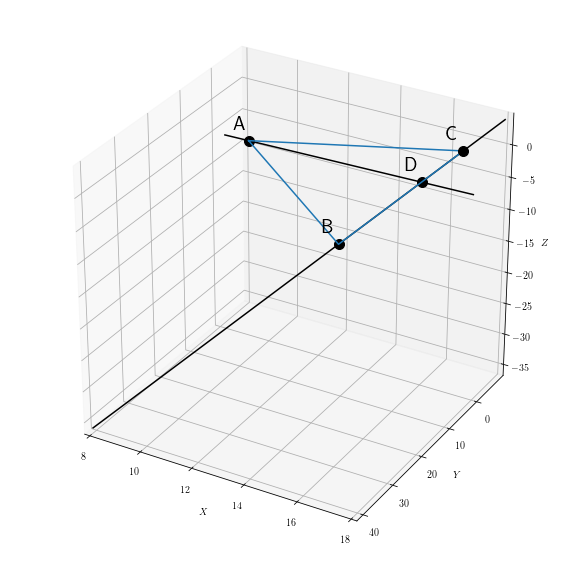

In [69]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, projection='3d')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

t = -0.7; X = numpy.linspace(8, 18, 100)
P = numpy.array([[9,-2,-6,'A'], [14,11,-12,'B'], [17,-4,0,'C'],[16,1,-4,'D']])

ax.plot(X, - 5 * X + 81,  4 * X - 68, c='black')
ax.plot(X, 3 * (X - 9) / 7 - 2,  2 * (X - 9) / 7 - 6, c='black')

ax.plot(P[[0,1,2,0],0].astype('int16'), 
        P[[0,1,2,0],1].astype('int16'), 
        P[[0,1,2,0],2].astype('int16'))
for point in P:
    ax.scatter(int(point[0]), int(point[1]), int(point[2]), point[3], c='black', s=100)
    ax.text(int(point[0])+t, int(point[1])+t, int(point[2])-t, point[3], fontsize=20)

ax.set_xlim(8,18); ax.set_ylim(-5*8+81,-5*18+81); ax.set_zlim(4*8-68,4*18-68)
ax.set_xlabel(r'$X$'); ax.set_ylabel(r'$Y$'); ax.set_zlabel(r'$Z$');
#ax.view_init(30,15);

# Типовой расчет 14 / Standard Calculation 14

## Постановка  задачи / Formulation of the problem:

Через данную прямую $a$ проходят две плоскости.

Одна из них проходит через данную точку $A$, другая - через данную точку $B$.

Найти уравнения плоскостей, которые делят пополам двугранные углы,

образованные этими плоскостями.

$a: \frac{X + 1}{6} = \frac{Y - 1}{4} = \frac{Z}{9}; A = (-5, -6, -9); B = (2, 5, 11)$

# Типовой расчет 15 / Standard Calculation 15

## Постановка  задачи / Formulation of the problem:

Луч света идет вдоль прямой $L_1$, заданной как линия пересечения двух плоскостей,

и отражается от прямой $L_2$, также заданной как линия пересечения двух плоскостей.

Найти направляющий вектор прямой, вдоль которой пойдет отраженный луч.

Уравнения прямой $L_1: 2X - 29Y - Z + 135 = 0; X - 20Y - Z + 94 = 0$.
    
Уравнения прямой $L_2: 10X - 3Y - 5Z - 35 = 0; 5X - 9Y - 10Z + 5 = 0$.    